# Day 7 "The Treachery of Whales"

## Part 1

### Problem

A giant whale has decided your submarine is its next meal, and it's much faster than you are. There's nowhere to run!

Suddenly, a swarm of crabs (each in its own tiny submarine - it's too deep for them otherwise) zooms in to rescue you! They seem to be preparing to blast a hole in the ocean floor; sensors indicate a massive underground cave system just beyond where they're aiming!

The crab submarines all need to be aligned before they'll have enough power to blast a large enough hole for your submarine to get through. However, it doesn't look like they'll be aligned before the whale catches you! Maybe you can help?

There's one major catch - crab submarines can only move horizontally.

You quickly make a list of the horizontal position of each crab (your puzzle input). Crab submarines have limited fuel, so you need to find a way to make all of their horizontal positions match while requiring them to spend as little fuel as possible.

For example, consider the following horizontal positions:

        16,1,2,0,4,2,7,1,2,14

This means there's a crab with horizontal position 16, a crab with horizontal position 1, and so on.

Each change of 1 step in horizontal position of a single crab costs 1 fuel. You could choose any horizontal position to align them all on, but the one that costs the least fuel is horizontal position 2:

        Move from 16 to 2: 14 fuel
        Move from 1 to 2: 1 fuel
        Move from 2 to 2: 0 fuel
        Move from 0 to 2: 2 fuel
        Move from 4 to 2: 2 fuel
        Move from 2 to 2: 0 fuel
        Move from 7 to 2: 5 fuel
        Move from 1 to 2: 1 fuel
        Move from 2 to 2: 0 fuel
        Move from 14 to 2: 12 fuel

This costs a total of 37 fuel. This is the cheapest possible outcome; more expensive outcomes include aligning at position 1 (41 fuel), position 3 (39 fuel), or position 10 (71 fuel).

Determine the horizontal position that the crabs can align to using the least fuel possible. How much fuel must they spend to align to that position?

### Setup

In [143]:
from utils import *

_input = initDay("day7")
_inputData = [int(h) for h in re.findall('\d+', _input)]

_sampleData = [16,1,2,0,4,2,7,1,2,14]

plotStyle({'axes.formatter.useoffset': False, 'axes.titley': .8})

def plot(result, costs, title):
    ax = plt.subplots()[1]
    ax.ticklabel_format(style='plain')
    ax.yaxis.tick_right()
    plt.ylabel("cost")
    plt.xlabel("position")
    plt.scatter(range(len(costs)), costs, s=10, c="#f99f50")
    plt.scatter(costs.index(result), result, s=50, c="#ed1c24")
    plt.title('   ' + title)

### Solution

Brute force the full range, calculating the cost to move all crabs to each position, and return the minimum of those costs. Cost is the sum of the distances to a given position for each crab.

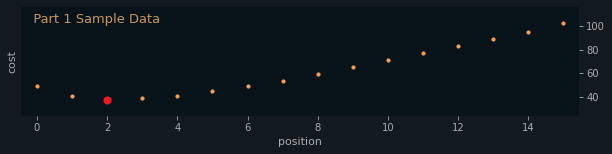

In [144]:
def solve(crabs, cost):
    costs = [
        sum([cost(crab, h) for h in crabs])
        for crab in range(max(crabs))]
    return min(costs), costs

def cost1(start, end):
    return abs(end - start)

sampleResult1, sampleCosts1 = solve(_sampleData, cost1)
check(sampleResult1, 37)
plot(sampleResult1, sampleCosts1, 'Part 1 Sample Data')

Part 1 Result: 344735


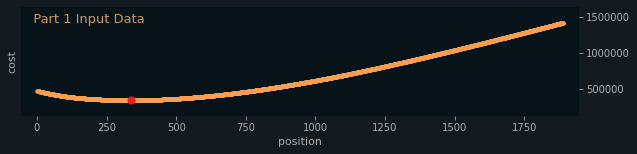

In [145]:
inputResult1, inputCosts1 = solve(_inputData, cost1)
check1(inputResult1)
plot(inputResult1, inputCosts1, 'Part 1 Input Data')

## Part 2

### Problem

The crabs don't seem interested in your proposed solution. Perhaps you misunderstand crab engineering?

As it turns out, crab submarine engines don't burn fuel at a constant rate. Instead, each change of 1 step in horizontal position costs 1 more unit of fuel than the last: the first step costs 1, the second step costs 2, the third step costs 3, and so on.

As each crab moves, moving further becomes more expensive. This changes the best horizontal position to align them all on; in the example above, this becomes 5:

        Move from 16 to 5: 66 fuel
        Move from 1 to 5: 10 fuel
        Move from 2 to 5: 6 fuel
        Move from 0 to 5: 15 fuel
        Move from 4 to 5: 1 fuel
        Move from 2 to 5: 6 fuel
        Move from 7 to 5: 3 fuel
        Move from 1 to 5: 10 fuel
        Move from 2 to 5: 6 fuel
        Move from 14 to 5: 45 fuel

This costs a total of 168 fuel. This is the new cheapest possible outcome; the old alignment position (2) now costs 206 fuel instead.

Determine the horizontal position that the crabs can align to using the least fuel possible so they can make you an escape route! How much fuel must they spend to align to that position?

### Solution

Same as Part 1, with a tweak to the cost equation. Now instead of distance, we need the sum of each intermediate distance as well. The forumula for this is `d*(d-1)/2`, something I still remember from grade school!

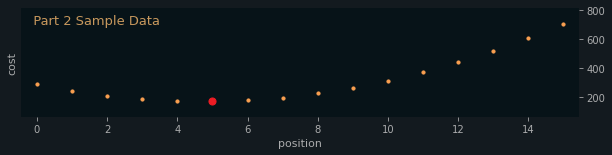

In [146]:
def cost2(start, end):
    d = abs(end - start)+1
    return d*(d-1)//2

sampleResult2, sampleCosts2 = solve(_sampleData, cost2)
check(sampleResult2, 168)
plot(sampleResult2, sampleCosts2, 'Part 2 Sample Data')

Part 2 Result: 96798233


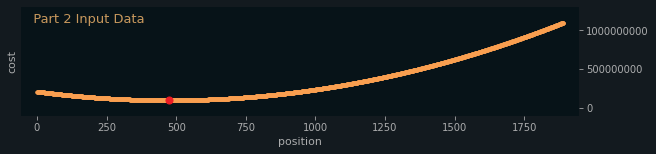

In [147]:
inputResult2, inputCosts2 = solve(_inputData, cost2)
check2(inputResult2)
plot(inputResult2, inputCosts2, 'Part 2 Input Data')